In [1]:
# Install libraries (if needed)
!pip install seaborn plotly folium

# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import HeatMap

# Display formatting
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="Set2")

# -------------------------------------
# 1. Load Dataset
# -------------------------------------
# Upload file manually OR load from Kaggle if you have API configured
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded.keys())))
print("Dataset loaded successfully!")

# Peek at dataset
df.head()


Saving AB_NYC_2019_cleaned.csv to AB_NYC_2019_cleaned (1).csv
Dataset loaded successfully!


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
# Shape
print("Shape:", df.shape)

# Data types and info
df.info()

# Basic statistics
df.describe(include='all')

Shape: (48595, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48595 entries, 0 to 48594
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48595 non-null  int64  
 1   name                            48595 non-null  object 
 2   host_id                         48595 non-null  int64  
 3   host_name                       48595 non-null  object 
 4   neighbourhood_group             48595 non-null  object 
 5   neighbourhood                   48595 non-null  object 
 6   latitude                        48595 non-null  float64
 7   longitude                       48595 non-null  float64
 8   room_type                       48595 non-null  object 
 9   price                           48595 non-null  int64  
 10  minimum_nights                  48595 non-null  int64  
 11  number_of_reviews               48595 non-null  int64  
 12  last_review  

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.859500e+04,48595,4.859500e+04,48595,48595,48595,48595.000000,48595.000000,48595,48595.000000,48595.000000,48595.000000,38698,48595.000000,48595.000000,48595.000000
unique,NaN,47614,NaN,11408,5,221,NaN,NaN,3,NaN,NaN,NaN,1762,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire Home/Apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,415,21465,3905,NaN,NaN,25192,NaN,NaN,NaN,1411,NaN,NaN,NaN
mean,1.902428e+07,NaN,6.763276e+07,NaN,NaN,NaN,40.728929,-73.952051,NaN,141.329231,6.785575,23.358247,NaN,1.095029,7.168515,112.416586
std,1.097947e+07,NaN,7.861646e+07,NaN,NaN,NaN,0.054569,0.046174,NaN,116.761806,16.128145,44.635326,NaN,1.599530,33.043089,131.395684
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,10.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000
25%,9.476973e+06,NaN,7.825716e+06,NaN,NaN,NaN,40.690005,-73.982980,NaN,69.000000,1.000000,1.000000,NaN,0.040000,1.000000,0.000000
50%,1.968028e+07,NaN,3.081281e+07,NaN,NaN,NaN,40.722970,-73.955600,NaN,105.000000,3.000000,5.000000,NaN,0.380000,1.000000,44.000000
75%,2.915081e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763130,-73.936125,NaN,175.000000,5.000000,24.000000,NaN,1.595000,2.000000,226.000000


In [3]:
# Count missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Values": missing,
    "Percent (%)": missing_percent.round(2)
})

missing_df

,Missing Values,Percent (%)
last_review,9897,20.37
id,0,0.00
host_id,0,0.00
name,0,0.00
neighbourhood_group,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
host_name,0,0.00
longitude,0,0.00
room_type,0,0.00


In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))

Numeric Columns: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Categorical Columns: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


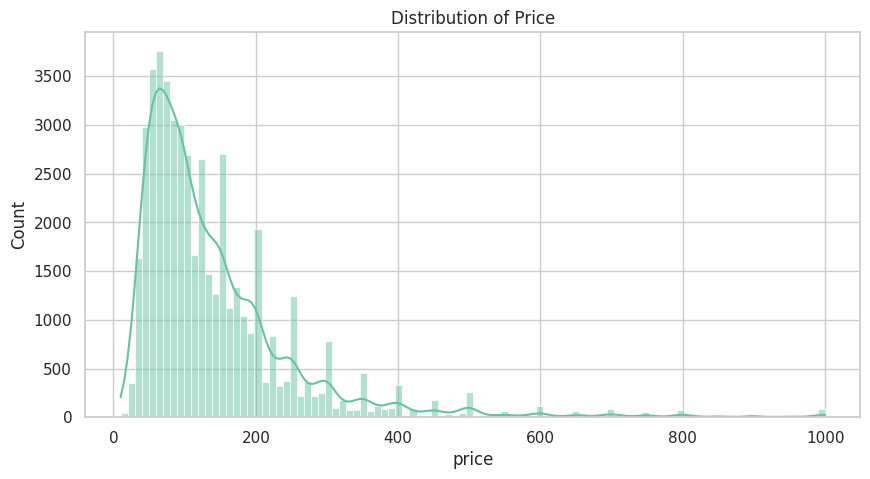

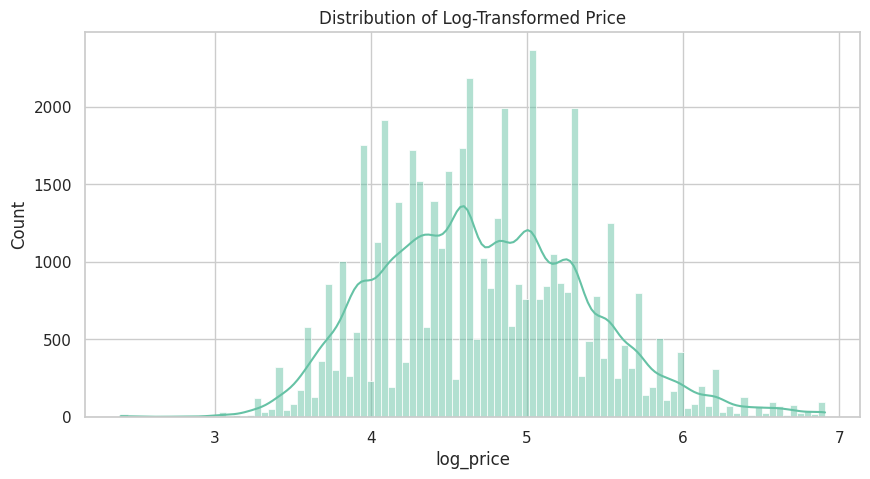

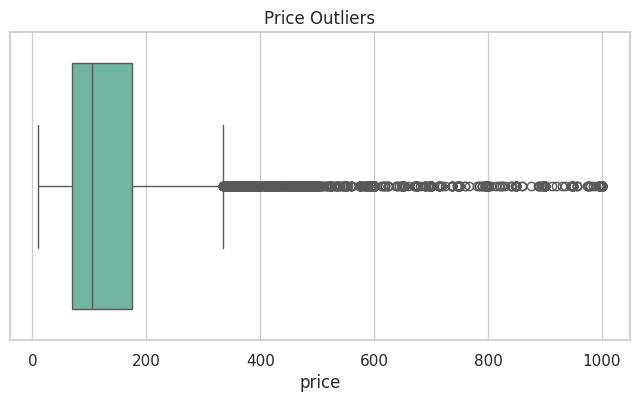

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df["price"], bins=100, kde=True)
plt.title("Distribution of Price")
plt.show()

# Log-transformed price (helps with skew)
df["log_price"] = np.log1p(df["price"])

plt.figure(figsize=(10,5))
sns.histplot(df["log_price"], bins=100, kde=True)
plt.title("Distribution of Log-Transformed Price")
plt.show()

# Boxplot for outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df["price"])
plt.title("Price Outliers")
plt.show()

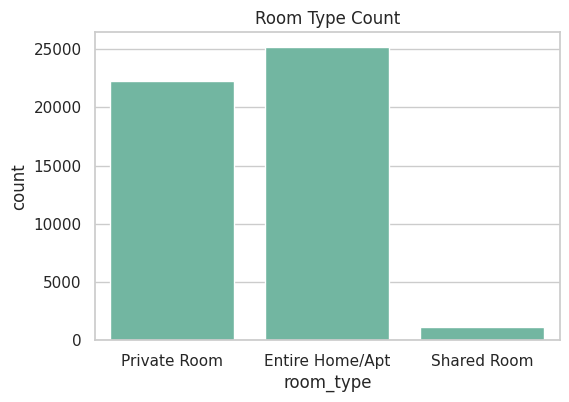

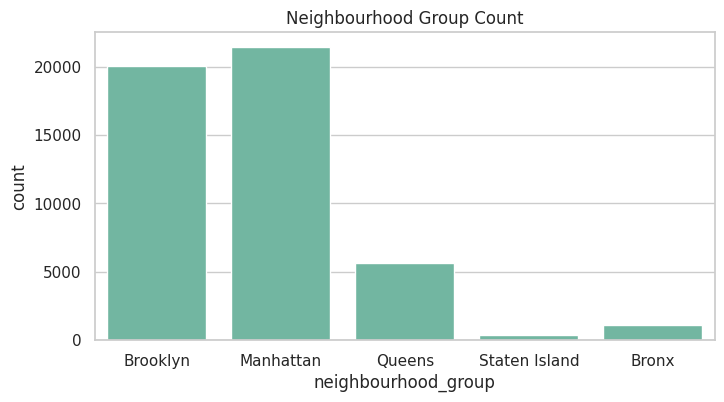

In [6]:
# Room type distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="room_type")
plt.title("Room Type Count")
plt.show()

# Neighborhood group distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="neighbourhood_group")
plt.title("Neighbourhood Group Count")
plt.show()

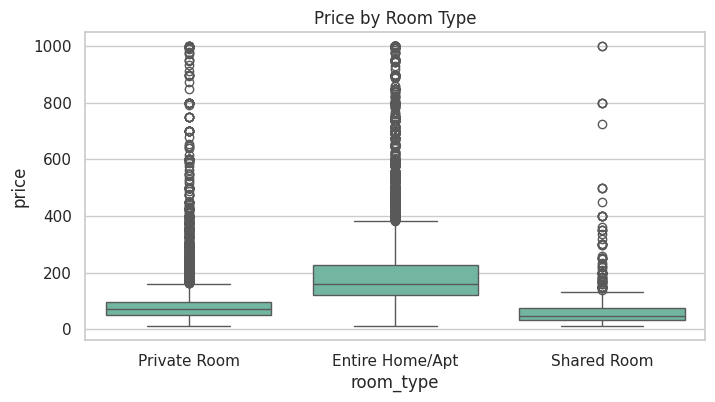

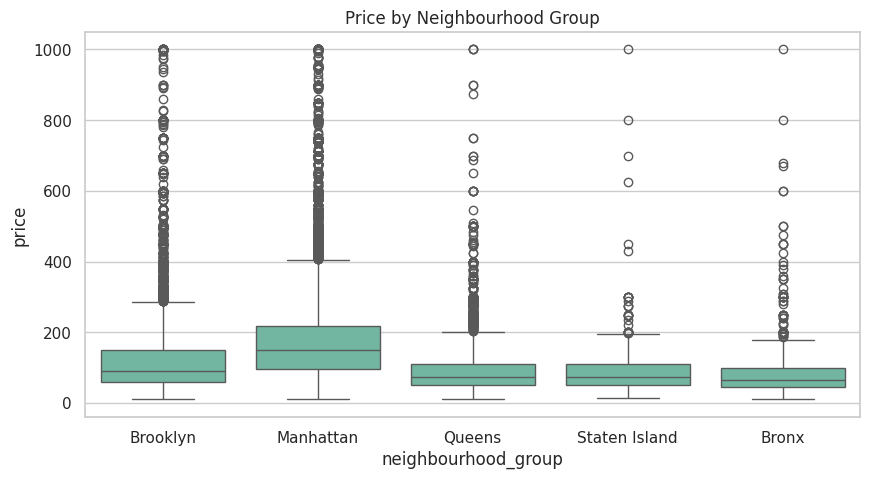

In [7]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="room_type", y="price")
plt.title("Price by Room Type")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="neighbourhood_group", y="price")
plt.title("Price by Neighbourhood Group")
plt.show()

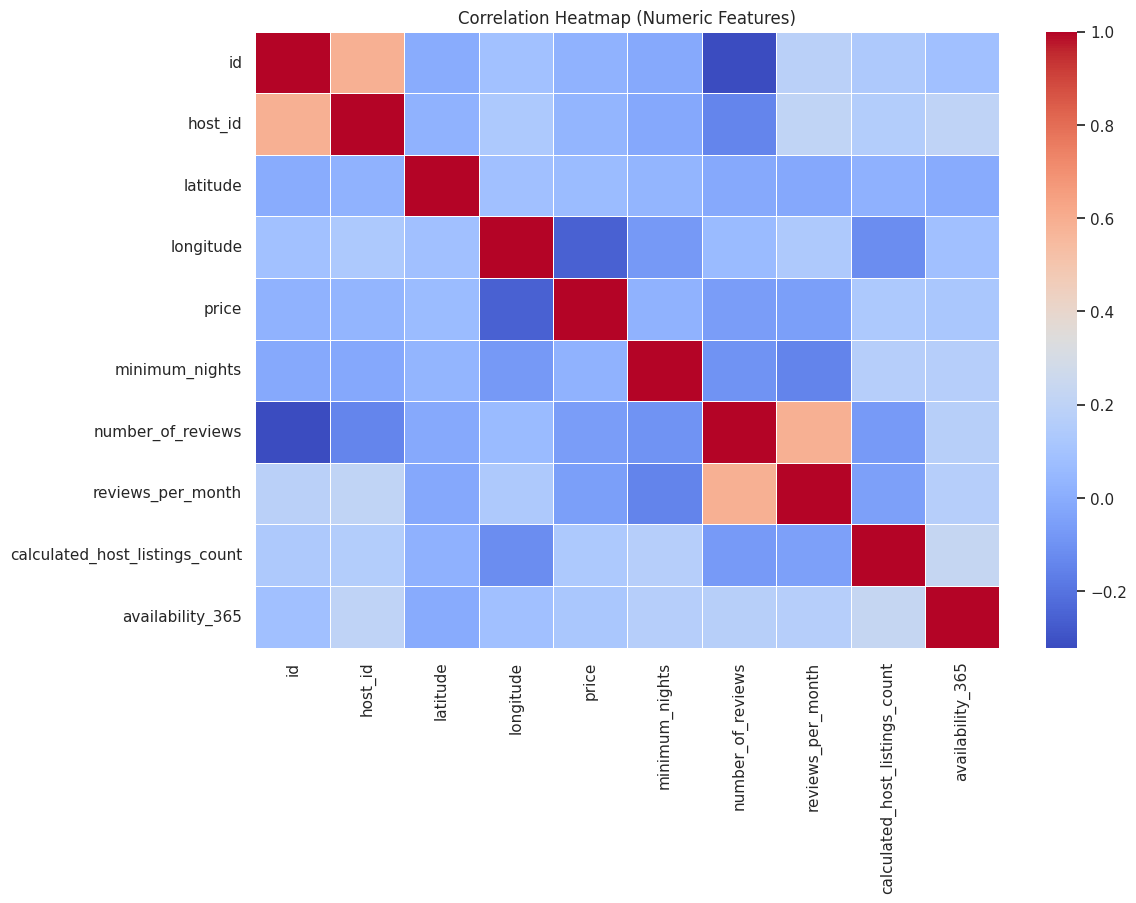

In [8]:
plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

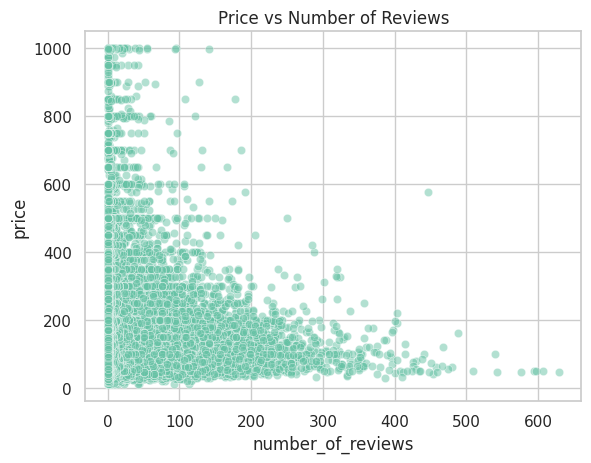

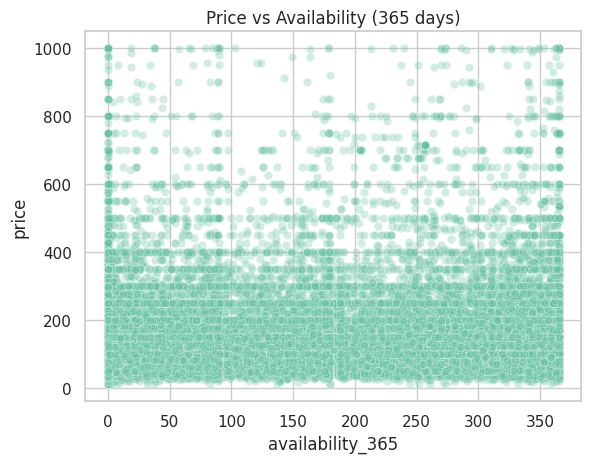

In [9]:
# Price vs number of reviews
sns.scatterplot(data=df, x="number_of_reviews", y="price", alpha=0.5)
plt.title("Price vs Number of Reviews")
plt.show()

# Price vs availability
sns.scatterplot(data=df, x="availability_365", y="price", alpha=0.3)
plt.title("Price vs Availability (365 days)")
plt.show()

In [10]:
# Filter out invalid coordinates
df_geo = df[(df['latitude'].between(40, 41)) & (df['longitude'].between(-75, -73))]

# Create base map centered around NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add heatmap (density of listings)
heat_data = df_geo[['latitude', 'longitude']].dropna().values.tolist()
HeatMap(heat_data, radius=8).add_to(nyc_map)

nyc_map

In [11]:
fig = px.scatter_mapbox(
    df_geo.sample(5000),  # sample for performance
    lat="latitude",
    lon="longitude",
    color="price",
    size="price",
    mapbox_style="carto-positron",
    zoom=10,
    title="NYC Airbnb Prices (Geospatial Scatter)"
)
fig.show()

In [12]:
df.groupby("neighbourhood_group")["price"].agg(["mean", "median", "count"]).sort_values("mean", ascending=False)

,mean,median,count
neighbourhood_group,,,
Manhattan,178.959842,149.0,21465
Brooklyn,117.894755,90.0,20020
Staten Island,98.584906,75.0,371
Queens,94.999823,75.0,5652
Bronx,85.330267,65.0,1087


In [13]:
df.to_csv("airbnb_cleaned.csv", index=False)
print("Cleaned file saved!")

Cleaned file saved!
